In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Advertising.csv')

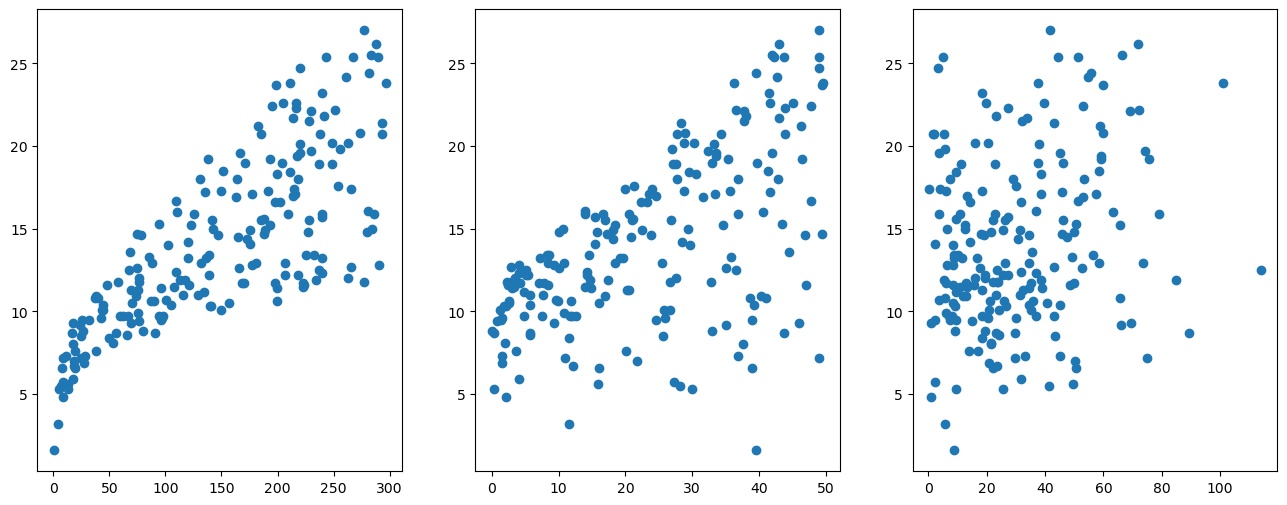

In [53]:
fig , axis= plt.subplots(nrows=1 , ncols=3 , figsize=(16,6))
axis[0].plot(df['TV'] , df['sales'] , 'o')
axis[1].plot(df['radio'] , df['sales'], 'o')
axis[2].plot(df['newspaper'] , df['sales'], 'o')

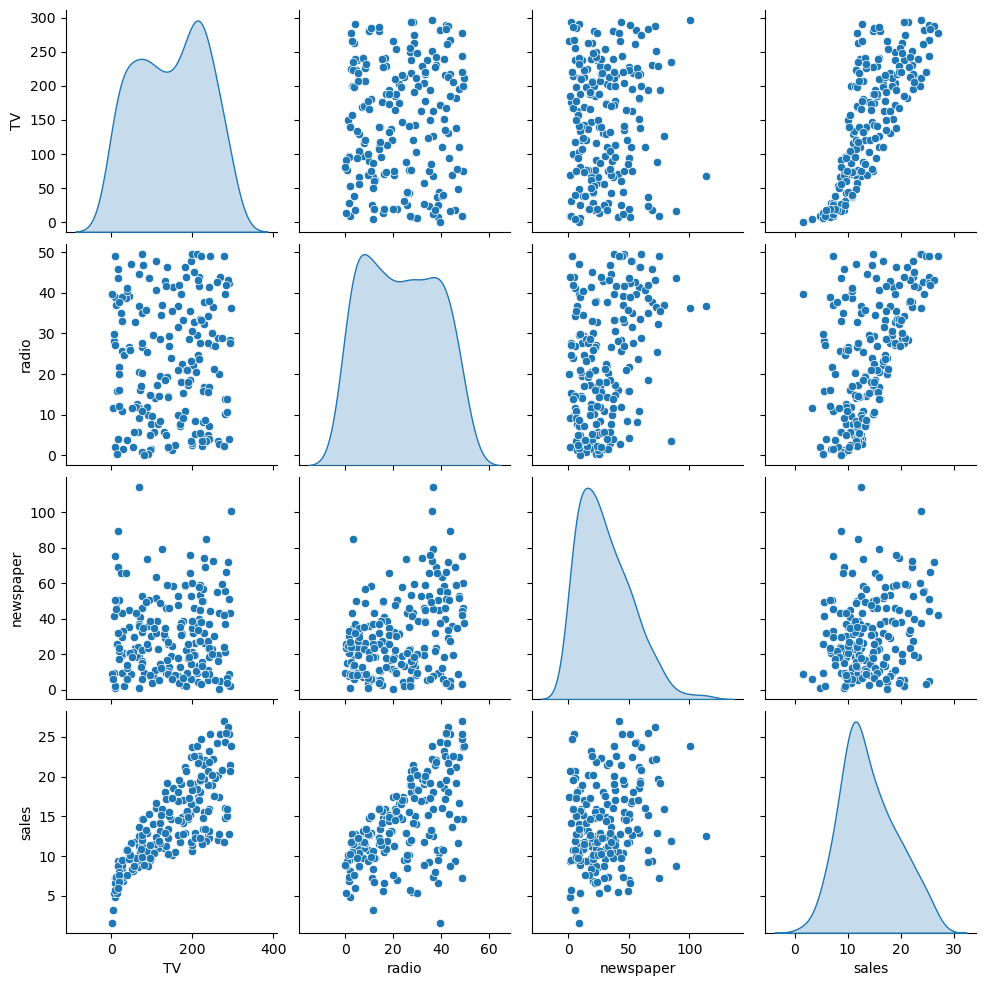

In [7]:
sns.pairplot(data=df , diag_kind='kde')

# ِData classification to train & test

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop('sales' , axis=1)
y=df['sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [19]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


# Implementation LinearRegression Model

In [1]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()

In [25]:
model.fit(X_train , y_train)

LinearRegression()

In [27]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [29]:
model.intercept_

3.151526768070653

# Evaluating Regression

## MAE & MSE & RMSE

In [37]:
test_predictions=model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [39]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [43]:
MAE=mean_absolute_error(y_test , test_predictions)
MAE

1.2137457736144803

In [45]:
MSE=mean_squared_error(y_test , test_predictions)
MSE

2.2987166978863782

In [47]:
RMSE=np.sqrt(MSE)
RMSE

1.516151937599388

In [49]:
df['sales'].mean()

14.0225

## Residual Error

In [60]:
test_res=y_test - test_predictions

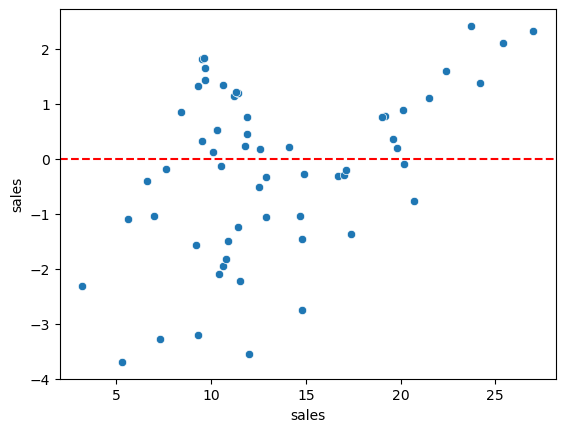

In [62]:
sns.scatterplot(x=y_test , y=test_res)
plt.axhline(y=0 , color='red' , ls='--')

<Axes: xlabel='sales', ylabel='Density'>

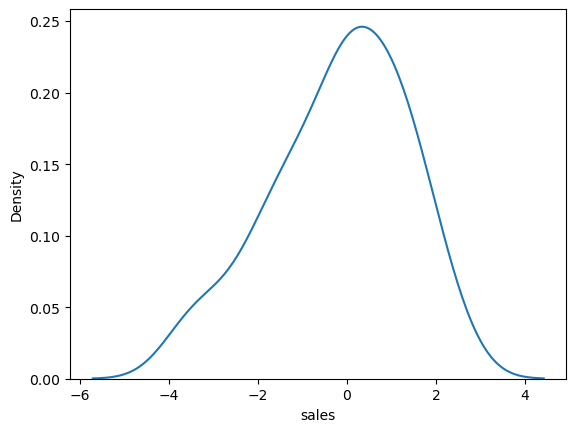

In [64]:
sns.kdeplot(test_res)

In [66]:
import scipy as sp

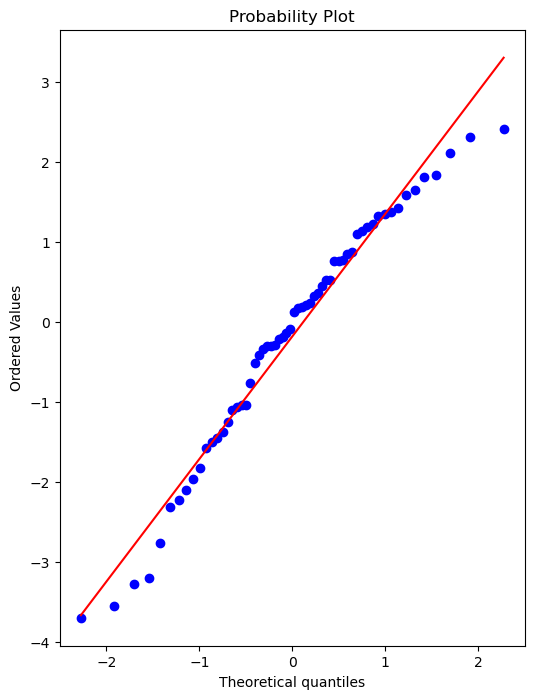

In [69]:
fig , ax = plt.subplots(figsize=(6,8) , dpi=100)
_ = sp.stats.probplot(test_res , plot=ax)

# Retraining the model with full data

In [13]:
final_model=LinearRegression()

In [15]:
final_model.fit(X , y)

LinearRegression()

In [19]:
y_hat = final_model.predict(X)

Text(0.5, 1.0, 'newspaper')

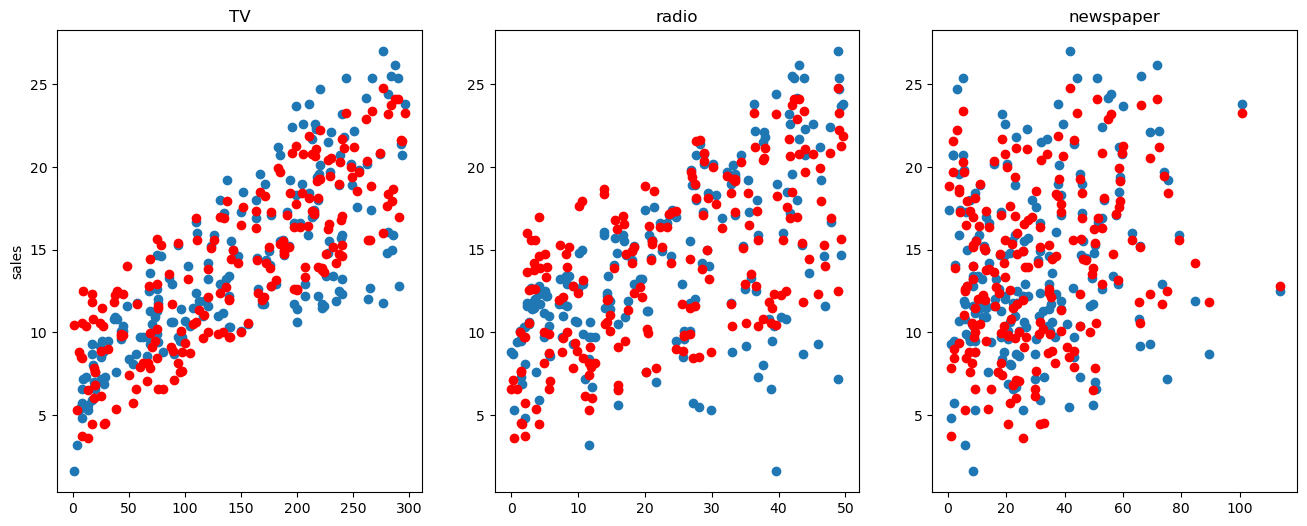

In [21]:
fig , axes= plt.subplots(nrows=1 , ncols=3 , figsize=(16,6))
axes[0].plot(df['TV'] , df['sales'] , 'o')
axes[0].plot(df['TV'] , y_hat , 'o' , color='red')
axes[0].set_title('TV')
axes[0].set_ylabel('sales')

axes[1].plot(df['radio'] , df['sales'] , 'o')
axes[1].plot(df['radio'] , y_hat , 'o' , color='red')
axes[1].set_title('radio')

axes[2].plot(df['newspaper'] , df['sales'] , 'o')
axes[2].plot(df['newspaper'] , y_hat , 'o' , color='red')
axes[2].set_title('newspaper')

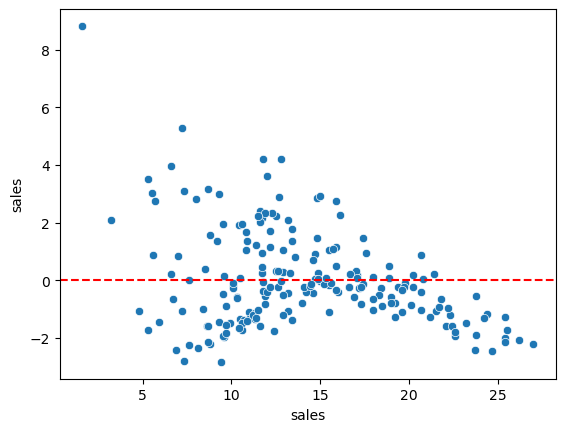

In [23]:
residuals=y_hat - y
sns.scatterplot(x=y , y=residuals)
plt.axhline(y=0 , color='r' , ls='--')

In [25]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [27]:
final_model.intercept_

2.9388893694594067

In [29]:
coeff_df= pd.DataFrame(final_model.coef_ , X.columns , columns=['coefficient'])
coeff_df

,coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [31]:
campaiyn=[[149,22,12]]
final_model.predict(campaiyn)

C:\Users\Ziba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

# save & loading model

In [33]:
from joblib import dump , load

In [35]:
dump(final_model , 'sales_model.joblib')

['sales_model.joblib']

In [37]:
load_model=load('sales_model.joblib')

In [39]:
load_model.predict(campaiyn)

C:\Users\Ziba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])